In [187]:
import numpy as np
import matplotlib.pyplot as plt
import easypyplot
import pandas as pd
low_wl = ['503', '508', '521', '523', '525', '526', '531', '544', 'Bellmanford', 'Freqmine', 'Fluidaminate', 'Blackscholes', '507', '510', 'Raytrace', 'Dedup']
# medium_wl = ['507', '510', 'Raytrace', 'Dedup']
high_wl = ['502', '505', '519', '520', '549', '554', '557', 'PageRank', 'Canneal']
mix_wl = ['mix1', 'mix2', 'mix3', 'mix4']

['503.bwaves_r', '508.namd_r', '521.wrf_r', '523.xalancbmk_r', '525.x264_r', '526.blender_r', '531.deepsjeng_r', '544.nab_r', 'Bellmanford.ljournal', 'Freqmine', 'Fluidaminate', 'Blackscholes', '502.gcc_r', '505.mcf_r', '519.lbm_r', '520.omnetpp_r', '549.fotonik3d_r', '554.roms_r', '557.xz_r', 'PageRank.ljournal', 'Canneal', 'mix1', 'mix2', 'mix3', 'mix4', 'Canneal', 'Memory Insensitive Group', 'Memory Intensive Group']


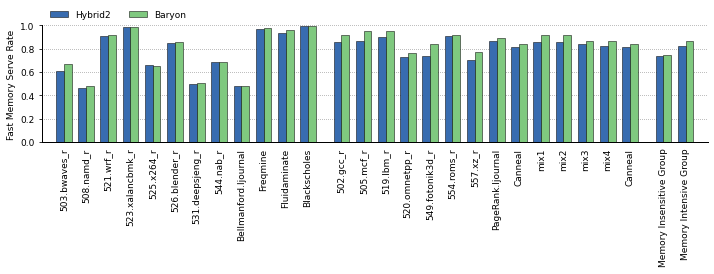

In [375]:
# graph_hitrate
# prepare ordered workload list
hitrate_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/1_performance/hitrate.csv')
hitrate_2darr = []
wl_list = []
for idx, workload in hitrate_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(low_id in wl_name for low_id in low_wl):
        wl_list.append(wl_name)
        hitrate_2darr.append([workload['Hybrid2 Hitrate'], workload['Baryon Hitrate']])
for idx, workload in hitrate_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(high_id in wl_name for high_id in high_wl):
        wl_list.append(wl_name)
        hitrate_2darr.append([workload['Hybrid2 Hitrate'], workload['Baryon Hitrate']])
for idx, workload in hitrate_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(mix_id in wl_name for mix_id in mix_wl):
        wl_list.append(wl_name)
        hitrate_2darr.append([workload['Hybrid2 Hitrate'], workload['Baryon Hitrate']])
for idx, workload in hitrate_csv.tail(3).iterrows():
    wl_list.append(workload['Benchmark'])
    hitrate_2darr.append([workload['Hybrid2 Hitrate'], workload['Baryon Hitrate']])

print(wl_list)
    
group_name = ['Hybrid2', 'Baryon']
fig_dims = (10, 2.5)
fig_name = '{}'.format("graph_hitrate")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [0, 1]]
hdls = []
for idx, hitrate in enumerate(hitrate_2darr):
    group_xticks.append(xtick_beg)
    xtick_beg += 1
    if idx == len(low_wl) - 1:
        xtick_beg += 0.5 # gap between categories
    if idx == len(wl_list) - 3:
        xtick_beg += 0.5 # gap for geomean items

bar_width = 0.7
hdls = easypyplot.barchart.draw(ax, hitrate_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')

# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Fast Memory Serve Rate')
ax.set_ylim([0, 1.0])

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = -0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# hitrate text
# for group_id in range(len(wl_list)):
#     for entry_id in range(2):
#         hitrate = hitrate_2darr[group_id][entry_id]
#         if entry_id % 2 == 0:
#             x = ax.get_xticks()[group_id] - bar_width / 4
#         else:
#             x = ax.get_xticks()[group_id] + bar_width / 4
#         x += 0.05 # a little offset
#         hitrate_text = str(hitrate)[0:5]
#         ax.text(x, hitrate, hitrate_text, ha='center', va='top', fontsize=8, rotation=90)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.2), loc='upper left', ncol=2)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

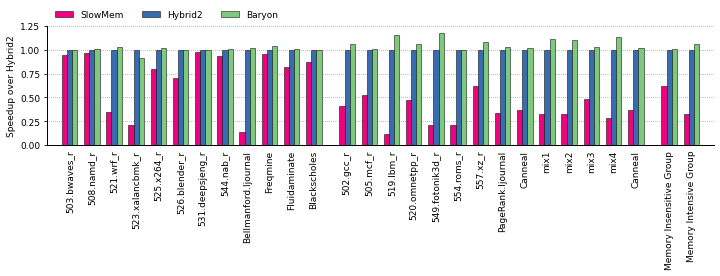

In [377]:
# speedup
# prepare ordered workload list
speedup_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/1_performance/speedup.csv')
speedup_2darr = []
wl_list = []
for idx, workload in speedup_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(low_id in wl_name for low_id in low_wl):
        wl_list.append(wl_name)
        speedup_2darr.append([workload['AllSlow Speedup'], workload['Hybrid2 Speedup'], workload['Baryon Speedup']])
for idx, workload in speedup_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(high_id in wl_name for high_id in high_wl):
        wl_list.append(wl_name)
        speedup_2darr.append([workload['AllSlow Speedup'], workload['Hybrid2 Speedup'], workload['Baryon Speedup']])
for idx, workload in speedup_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(mix_id in wl_name for mix_id in mix_wl):
        wl_list.append(wl_name)
        speedup_2darr.append([workload['AllSlow Speedup'], workload['Hybrid2 Speedup'], workload['Baryon Speedup']])
for idx, workload in speedup_csv.tail(3).iterrows():
    wl_list.append(workload['Benchmark'])
    speedup_2darr.append([workload['AllSlow Speedup'], workload['Hybrid2 Speedup'], workload['Baryon Speedup']])

group_name = ['SlowMem', 'Hybrid2', 'Baryon']
fig_dims = (10, 2.5)
fig_name = '{}'.format("graph_speedup")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [2, 0, 1]]
hdls = []
for idx, speedup in enumerate(speedup_2darr):
    group_xticks.append(xtick_beg)
    xtick_beg += 1
    if idx == len(low_wl) - 1:
        xtick_beg += 0.5 # gap between categories
    if idx == len(wl_list) - 3:
        xtick_beg += 0.5 # gap for geomean items

bar_width = 0.7
hdls = easypyplot.barchart.draw(ax, speedup_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')

# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Speedup over Hybrid2')
ax.set_ylim([0, 1.25])

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = -0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# speedup text
# for group_id in range(len(wl_list)):
#     for entry_id in range(2):
#         speedup = speedup_2darr[group_id][entry_id]
#         if entry_id % 2 == 0:
#             x = ax.get_xticks()[group_id] - bar_width / 4
#         else:
#             x = ax.get_xticks()[group_id] + bar_width / 4
#         x += 0.05 # a little offset
#         speedup_text = str(speedup)[0:5]
#         ax.text(x, speedup, speedup_text, ha='center', va='top', fontsize=8, rotation=90)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.2), loc='upper left', ncol=3)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

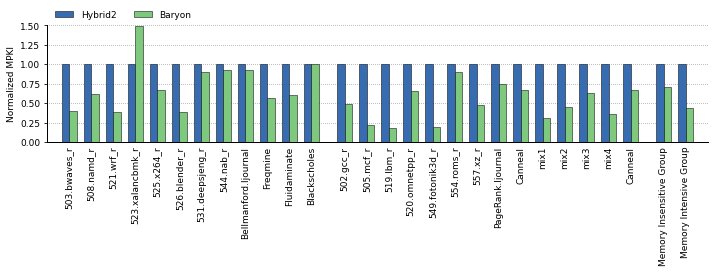

In [380]:
# mpki
# prepare ordered workload list
mpki_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/1_performance/mpki.csv')
mpki_2darr = []
wl_list = []
for idx, workload in mpki_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(low_id in wl_name for low_id in low_wl):
        wl_list.append(wl_name)
        mpki_2darr.append([1, workload['Normalized MPKI']])
for idx, workload in mpki_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(high_id in wl_name for high_id in high_wl):
        wl_list.append(wl_name)
        mpki_2darr.append([1, workload['Normalized MPKI']])
for idx, workload in mpki_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(mix_id in wl_name for mix_id in mix_wl):
        wl_list.append(wl_name)
        mpki_2darr.append([1, workload['Normalized MPKI']])
for idx, workload in mpki_csv.tail(3).iterrows():
    wl_list.append(workload['Benchmark'])
    mpki_2darr.append([1, workload['Normalized MPKI']])

group_name = ['Hybrid2', 'Baryon']
fig_dims = (10, 2.5)
fig_name = '{}'.format("graph_mpki")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [0, 1]]
hdls = []
for idx, mpki in enumerate(mpki_2darr):
    group_xticks.append(xtick_beg)
    xtick_beg += 1
    if idx == len(low_wl) - 1:
        xtick_beg += 0.5 # gap between categories
    if idx == len(wl_list) - 3:
        xtick_beg += 0.5 # gap for geomean items

bar_width = 0.7
hdls = easypyplot.barchart.draw(ax, mpki_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')

# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Normalized MPKI')
ax.set_ylim([0, 1.5])

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = -0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# mpki text
# for group_id in range(len(wl_list)):
#     for entry_id in range(2):
#         mpki = mpki_2darr[group_id][entry_id]
#         if entry_id % 2 == 0:
#             x = ax.get_xticks()[group_id] - bar_width / 4
#         else:
#             x = ax.get_xticks()[group_id] + bar_width / 4
#         x += 0.05 # a little offset
#         mpki_text = str(mpki)[0:5]
#         ax.text(x, mpki, mpki_text, ha='center', va='top', fontsize=8, rotation=90)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.2), loc='upper left', ncol=2)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

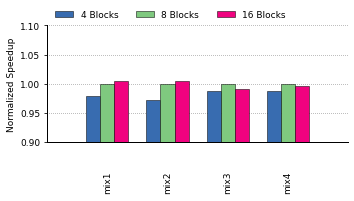

In [404]:
# superblock scope
# prepare ordered workload list
mpki_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/3_sensitivity/superblksize.csv')
mpki_2darr = []
wl_list = []
for idx, workload in mpki_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(mix_id in wl_name for mix_id in mix_wl):
        wl_list.append(wl_name)
        mpki_2darr.append([workload['4 Slowdown'], 1, workload['16 Slowdown']])

group_name = ['4 Blocks', '8 Blocks', '16 Blocks']
fig_dims = (5, 2.5)
fig_name = '{}'.format("graph_superblksize")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [0, 1, 2]]
hdls = []
for idx, mpki in enumerate(mpki_2darr):
    group_xticks.append(xtick_beg)
    xtick_beg += 1

bar_width = 0.7
hdls = easypyplot.barchart.draw(ax, mpki_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')
# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Normalized Speedup')
ax.set_ylim([0.9, 1.1])

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = 0.85
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# mpki text
# for group_id in range(len(wl_list)):
#     for entry_id in range(2):
#         mpki = mpki_2darr[group_id][entry_id]
#         if entry_id % 2 == 0:
#             x = ax.get_xticks()[group_id] - bar_width / 4
#         else:
#             x = ax.get_xticks()[group_id] + bar_width / 4
#         x += 0.05 # a little offset
#         mpki_text = str(mpki)[0:5]
#         ax.text(x, mpki, mpki_text, ha='center', va='top', fontsize=8, rotation=90)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.2), loc='upper left', ncol=3)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

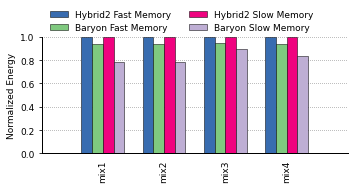

In [414]:
# reduced energy
# prepare ordered workload list
energy_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/2_energycost/energy.csv')
energy_2darr = []
wl_list = []
for idx, workload in energy_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(mix_id in wl_name for mix_id in mix_wl):
        wl_list.append(wl_name)
        energy_2darr.append([1, workload['Normalized fastEnergy'], 1, workload['Normalized slowEnergy']])

group_name = ['Hybrid2 Fast Memory', 'Baryon Fast Memory', 'Hybrid2 Slow Memory', 'Baryon Slow Memory']
fig_dims = (5, 2.5)
fig_name = '{}'.format("graph_energy")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [0, 1, 2, 3]]
hdls = []
for idx, energy in enumerate(energy_2darr):
    group_xticks.append(xtick_beg)
    xtick_beg += 1

bar_width = 0.7
hdls = easypyplot.barchart.draw(ax, energy_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')
# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Normalized Energy')
ax.set_ylim([0, 1])

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = -0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# energy text
# for group_id in range(len(wl_list)):
#     for entry_id in range(2):
#         energy = energy_2darr[group_id][entry_id]
#         if entry_id % 2 == 0:
#             x = ax.get_xticks()[group_id] - bar_width / 4
#         else:
#             x = ax.get_xticks()[group_id] + bar_width / 4
#         x += 0.05 # a little offset
#         energy_text = str(energy)[0:5]
#         ax.text(x, energy, energy_text, ha='center', va='top', fontsize=8, rotation=90)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.3), loc='upper left', ncol=2)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

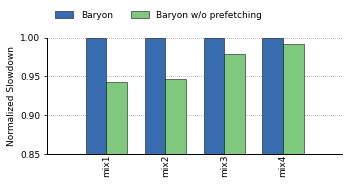

In [423]:
# nopefetch
# prepare ordered workload list
energy_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/3_sensitivity/noprefetch.csv')
energy_2darr = []
wl_list = []
for idx, workload in energy_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(mix_id in wl_name for mix_id in mix_wl):
        wl_list.append(wl_name)
        energy_2darr.append([1, workload['Slowdown']])

group_name = ['Baryon', 'Baryon w/o prefetching']
fig_dims = (5, 2.5)
fig_name = '{}'.format("graph_noprefetch")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [0, 1, 2, 3]]
hdls = []
for idx, energy in enumerate(energy_2darr):
    group_xticks.append(xtick_beg)
    xtick_beg += 1

bar_width = 0.7
hdls = easypyplot.barchart.draw(ax, energy_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')
# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Normalized Slowdown')
ax.set_ylim([0.85, 1])

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = ax.get_ylim()[0]
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# energy text
# for group_id in range(len(wl_list)):
#     for entry_id in range(2):
#         energy = energy_2darr[group_id][entry_id]
#         if entry_id % 2 == 0:
#             x = ax.get_xticks()[group_id] - bar_width / 4
#         else:
#             x = ax.get_xticks()[group_id] + bar_width / 4
#         x += 0.05 # a little offset
#         energy_text = str(energy)[0:5]
#         ax.text(x, energy, energy_text, ha='center', va='top', fontsize=8, rotation=90)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.3), loc='upper left', ncol=2)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

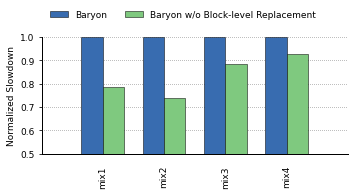

In [428]:
# only intra evict
# prepare ordered workload list
energy_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/3_sensitivity/onlyintraevict.csv')
energy_2darr = []
wl_list = []
for idx, workload in energy_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(mix_id in wl_name for mix_id in mix_wl):
        wl_list.append(wl_name)
        energy_2darr.append([1, workload['Slowdown']])

group_name = ['Baryon', 'Baryon w/o Block-level Replacement']
fig_dims = (5, 2.5)
fig_name = '{}'.format("graph_onlyintraevict")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [0, 1, 2, 3]]
hdls = []
for idx, energy in enumerate(energy_2darr):
    group_xticks.append(xtick_beg)
    xtick_beg += 1

bar_width = 0.7
hdls = easypyplot.barchart.draw(ax, energy_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')
# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Normalized Slowdown')
ax.set_ylim([0.5, 1])

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = ax.get_ylim()[0] - 0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# energy text
# for group_id in range(len(wl_list)):
#     for entry_id in range(2):
#         energy = energy_2darr[group_id][entry_id]
#         if entry_id % 2 == 0:
#             x = ax.get_xticks()[group_id] - bar_width / 4
#         else:
#             x = ax.get_xticks()[group_id] + bar_width / 4
#         x += 0.05 # a little offset
#         energy_text = str(energy)[0:5]
#         ax.text(x, energy, energy_text, ha='center', va='top', fontsize=8, rotation=90)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.3), loc='upper left', ncol=2)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

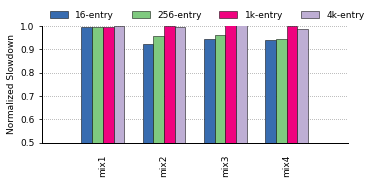

In [433]:
# sample addr set size
# prepare ordered workload list
energy_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/3_sensitivity/samplesetsize.csv')
energy_2darr = []
wl_list = []
for idx, workload in energy_csv.iterrows():
    wl_name = workload['Benchmark']
    if any(mix_id in wl_name for mix_id in mix_wl):
        wl_list.append(wl_name)
        energy_2darr.append([workload['16 Slowdown'], workload['256 Slowdown'], workload['1K Slowdown'], workload['4K Slowdown']])

group_name = ['16-entry', '256-entry', '1k-entry', '4k-entry']
fig_dims = (5, 2.5)
fig_name = '{}'.format("graph_samplesetsize")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [0, 1, 2, 3]]
hdls = []
for idx, energy in enumerate(energy_2darr):
    group_xticks.append(xtick_beg)
    xtick_beg += 1

bar_width = 0.7
hdls = easypyplot.barchart.draw(ax, energy_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')
# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Normalized Slowdown')
ax.set_ylim([0.5, 1])

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = ax.get_ylim()[0] - 0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# energy text
# for group_id in range(len(wl_list)):
#     for entry_id in range(2):
#         energy = energy_2darr[group_id][entry_id]
#         if entry_id % 2 == 0:
#             x = ax.get_xticks()[group_id] - bar_width / 4
#         else:
#             x = ax.get_xticks()[group_id] + bar_width / 4
#         x += 0.05 # a little offset
#         energy_text = str(energy)[0:5]
#         ax.text(x, energy, energy_text, ha='center', va='top', fontsize=8, rotation=90)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.2), loc='upper left', ncol=4)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


[[-0.23333333  0.          0.23333333]
 [ 0.76666667  1.          1.23333333]
 [ 1.76666667  2.          2.23333333]]
[[nan, nan, nan], [0.779850165, 0.7779325020000001, 0.778449598], [0.8353079999999999, 0.7724449999999999, 0.7668050000000001]]


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


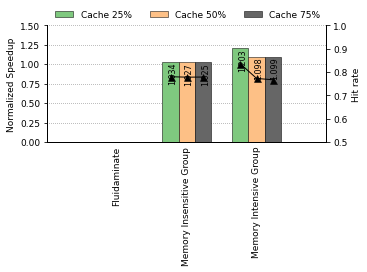

In [385]:
# cache_flat_ratio
# prepare ordered workload list
cache_flat_ratio_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/3_sensitivity/cacheflatratio.csv')
cache_flat_ratio_2darr = []
hitrate_2darr = []
wl_list = []
# TODO: if we want to show the result of mix
# for idx, workload in cache_flat_ratio_csv.iterrows():
#     wl_name = workload['Benchmark']
#     if any(mix_id in wl_name for mix_id in mix_wl):
#         wl_list.append(wl_name)
#         cache_flat_ratio_2darr.append([workload['Cache25% Flat75% Speedup_over_hybrid2'], workload['Cache50% Flat50% Speedup_over_hybrid2'], workload['Cache75% Flat25% Speedup_over_hybrid2']])
#         hitrate_2darr.append([workload['Cache25% Flat75% Hitrate'], workload['Cache50% Flat50% Hitrate'], workload['Cache75% Flat25% Hitrate']])
for idx, workload in cache_flat_ratio_csv.tail(3).iterrows():
    wl_list.append(workload['Benchmark'])
    cache_flat_ratio_2darr.append([workload['Cache25% Flat75% Speedup_over_hybrid2'], workload['Cache50% Flat50% Speedup_over_hybrid2'], workload['Cache75% Flat25% Speedup_over_hybrid2']])
    hitrate_2darr.append([workload['Cache25% Flat75% Hitrate'], workload['Cache50% Flat50% Hitrate'], workload['Cache75% Flat25% Hitrate']])

group_name = ['Cache 25%', 'Cache 50%', 'Cache 75%']
fig_dims = (5, 2.5)
fig_name = '{}'.format("graph_cacheratio")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
ax2 = ax.twinx()
easypyplot.format.turn_off_box(ax, twinx_axes=ax2)

# x ticks
group_xticks = []
all_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [1, 5, 6]]
hdls = []
bar_width = 0.7
for idx, cache_flat_ratio in enumerate(cache_flat_ratio_2darr):
    group_xticks.append(xtick_beg)
    xticks = list(np.arange(xtick_beg, xtick_beg+len(cache_flat_ratio_2darr) * bar_width / 3, bar_width / 3) - bar_width / 3)
    all_xticks.append(xticks)
    xtick_beg += 1
    if idx == len(wl_list) - 4:
        xtick_beg += 0.5 # gap for geomean items

hdls = easypyplot.barchart.draw(ax, cache_flat_ratio_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')

# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Normalized Speedup')
ax.set_ylim([0, 1.5])

# y text
tick_x_list = []
for group_id in range(len(cache_flat_ratio_2darr)):
    for entry_id in range(3):
        cache_flat_ratio = cache_flat_ratio_2darr[group_id][entry_id]
        x = ax.get_xticks()[group_id] + entry_id * bar_width / 3 - bar_width / 3
        tick_x_list.append(x)
        x += 0.03 # a little offset
        cache_flat_ratio_text = "%.03f" % cache_flat_ratio
        y_pos = min(cache_flat_ratio, 5)
        ax.text(x, y_pos, cache_flat_ratio_text, ha='center', va='top', fontsize=8, rotation=90)

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = -0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# hit rate plot
ax2.set_ylabel('Hit rate')
ax2.set_ylim([0.5, 1])
tick_x_2darr = np.reshape(all_xticks, (-1, 3))
print(tick_x_2darr)
print(hitrate_2darr)
for (group_x, group_y) in zip(tick_x_2darr, hitrate_2darr):
    ax2.plot(group_x, group_y, 'k', marker='^', markersize=7)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.2), loc='upper left', ncol=3)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

[[-0.23333333  0.          0.23333333]
 [ 0.76666667  1.          1.23333333]
 [ 1.76666667  2.          2.23333333]]
[[1.0, 1.0, 1.0], [0.896720135, 0.906374095, 0.948289513], [0.897860765, 0.934153821, 0.9810903459999999]]


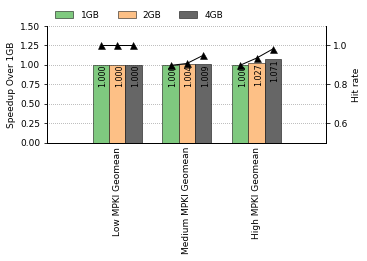

In [369]:
# fastmem capacity
# prepare ordered workload list
fastmem_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/3_sensitivity/fastmemcapacity.csv')
fastmem_2darr = []
hitrate_2darr = []
wl_list = []
# TODO: if we want to show the result of mix
# for idx, workload in fastmem_csv.iterrows():
#     wl_name = workload['Benchmark']
#     if any(mix_id in wl_name for mix_id in mix_wl):
#         wl_list.append(wl_name)
#         fastmem_2darr.append([workload['1GB Speedup'], workload['2GB Speedup'], workload['4GB Speedup']])
#         hitrate_2darr.append([workload['1GB Hitrate'], workload['2GB Hitrate'], workload['4GB Hitrate']])
for idx, workload in fastmem_csv.tail(3).iterrows():
    wl_list.append(workload['Benchmark'])
    fastmem_2darr.append([workload['1GB Speedup'], workload['2GB Speedup'], workload['4GB Speedup']])
    hitrate_2darr.append([workload['1GB Hitrate'], workload['2GB Hitrate'], workload['4GB Hitrate']])
    

group_name = ['1GB', '2GB', '4GB']
fig_dims = (5, 2.5)
fig_name = '{}'.format("graph_fastmem")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
ax2 = ax.twinx()
easypyplot.format.turn_off_box(ax, twinx_axes=ax2)

# x ticks
group_xticks = []
all_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [1, 5, 6]]
hdls = []
bar_width = 0.7
for idx, fastmem in enumerate(fastmem_2darr):
    group_xticks.append(xtick_beg)
    xticks = list(np.arange(xtick_beg, xtick_beg+len(fastmem_2darr) * bar_width / 3, bar_width / 3) - bar_width / 3)
    all_xticks.append(xticks)
    xtick_beg += 1
    if idx == len(wl_list) - 4:
        xtick_beg += 0.5 # gap for geomean items

hdls = easypyplot.barchart.draw(ax, fastmem_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')

# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Speedup Over 1GB')
ax.set_ylim([0, 1.5])

# y text
tick_x_list = []
for group_id in range(len(fastmem_2darr)):
    for entry_id in range(3):
        fastmem = fastmem_2darr[group_id][entry_id]
        x = ax.get_xticks()[group_id] + entry_id * bar_width / len(wl_list) - bar_width / len(wl_list)
        tick_x_list.append(x)
        x += 0.03 # a little offset
        fastmem_text = "%.03f" % fastmem
        y_pos = min(fastmem, 5)
        ax.text(x, y_pos, fastmem_text, ha='center', va='top', fontsize=8, rotation=90)

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = -0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# hit rate plot
ax2.set_ylabel('Hit rate')
ax2.set_ylim([0.5, 1.1])
tick_x_2darr = np.reshape(all_xticks, (-1, 3))
print(tick_x_2darr)
print(hitrate_2darr)
for (group_x, group_y) in zip(tick_x_2darr, hitrate_2darr):
    ax2.plot(group_x, group_y, 'k', marker='^', markersize=7)
    
# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.2), loc='upper left', ncol=3)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)

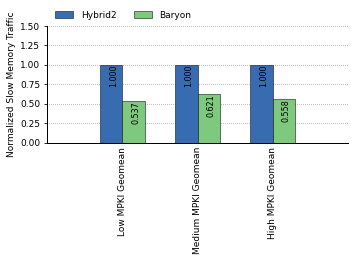

In [371]:
# slowtraffic
# prepare ordered workload list
slowtraffic_csv = pd.read_csv('/scorpio/home/liyiwei/pom-research/plot-micro21/data-repo-micro21-baryon/2_energycost/slowtraffic.csv')
slowtraffic_2darr = []
wl_list = []
# for idx, workload in slowtraffic_csv.iterrows():
#     wl_name = workload['Benchmark']
#     if any(mix_id in wl_name for mix_id in mix_wl):
#         wl_list.append(wl_name)
#         slowtraffic_2darr.append([1, workload['Normalized Traffic']])
for idx, workload in slowtraffic_csv.tail(3).iterrows():
    wl_list.append(workload['Benchmark'])
    slowtraffic_2darr.append([1, workload['Normalized Traffic']])
    

group_name = ['Hybrid2', 'Baryon']
fig_dims = (5, 2.5)
fig_name = '{}'.format("graph_slow_traffic")
pp, fig = easypyplot.pdf.plot_setup(fig_name, fig_dims)
ax = fig.gca()
easypyplot.format.turn_off_box(ax)

# x ticks
group_xticks = []
all_xticks = []
xtick_beg = 0
color_item = [easypyplot.color.COLOR_SET[i] for i in [0, 1]]
hdls = []
bar_width = 0.6
for idx, slowtraffic in enumerate(slowtraffic_2darr):
    group_xticks.append(xtick_beg)
    xticks = list(np.arange(xtick_beg, xtick_beg+len(slowtraffic_2darr) * bar_width, bar_width))
    all_xticks.append(xticks)
    xtick_beg += 1
    if idx == len(wl_list) - 4:
        xtick_beg += 0.5 # gap for geomean items

hdls = easypyplot.barchart.draw(ax, slowtraffic_2darr, width=bar_width, breakdown=False, xticks=group_xticks, group_names=wl_list, colors=color_item)
ax.set_xticklabels([], fontsize=8)
ax.set_xlim([ax.get_xticks()[0] - 1, ax.get_xticks()[-1] + 1])
ax.xaxis.set_ticks_position('none')

# y axis
ax.yaxis.grid(True)
ax.set_ylabel('Normalized Slow Memory Traffic')
ax.set_ylim([0, 1.5])

# y text
tick_x_list = []
for group_id in range(len(slowtraffic_2darr)):
    for entry_id in range(2):
        slowtraffic = slowtraffic_2darr[group_id][entry_id]
        x = ax.get_xticks()[group_id] + entry_id * bar_width / 2 - bar_width / 4
        tick_x_list.append(x)
        x += 0.03 # a little offset
        slowtraffic_text = "%.03f" % slowtraffic
        y_pos = min(slowtraffic, 5)
        ax.text(x, y_pos, slowtraffic_text, ha='center', va='top', fontsize=8, rotation=90)

fig.tight_layout()
easypyplot.format.resize_ax_box(ax, hratio=0.77)

# workload text
name_y_pos = -0.05
for idx, case in enumerate(wl_list):
    x = ax.get_xticks()[idx]
    ax.text(x, name_y_pos, case, ha='center', va='top', fontsize=9, rotation=90)

# Create legend
ax.legend(hdls, group_name, frameon=False, bbox_to_anchor=(0, 1.2), loc='upper left', ncol=3)

fig.savefig(fig_name+'.pdf',format="pdf", bbox_inches = 'tight')
# easypyplot.pdf.plot_teardown(pp)